In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,precision_score,recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Consider the below dataset. Applying Knowledge to the field of Medical Science and making the task of Physician easy is the main purpose of this dataset. This dataset has 132 parameters on which 42 different types of diseases can be predicted. Based on the dataset, now answer the following questions:(code + theory)

(i)What type of problem is the given dataset? Explain with examples?

    The given dataset is a classification problem, where the goal is to predict which of the 42 diseases a patient is likely to have based on their symptoms and demographic information. This is a supervised learning problem because the dataset includes labeled examples of patients with known diagnoses.

    Classification problems involve predicting discrete categorical values, such as the presence or absence of a disease, the type of a disease, or the outcome of a medical procedure. They are commonly used in healthcare to aid in diagnosis and treatment decisions, as well as in medical research to identify risk factors for different conditions.

    Examples of other classification problems in healthcare include:

    -Identifying cancerous cells in a biopsy sample based on their morphology and other characteristics.

    -Predicting the likelihood of a patient developing complications after surgery based on their medical history and demographic information.

    -Classifying patients with heart disease based on their symptoms and diagnostic tests.

    -Identifying patients who are at high risk of developing diabetes based on their lifestyle and genetic factors.

    -Predicting which patients are likely to respond well to a particular medication based on their genetic profile.

In [10]:


# Load the dataset
Disease_df = pd.read_csv('./Disease_data/Training.csv')

# Remove unnecessary columns
Disease_df.drop(['Unnamed: 133'], axis=1, inplace=True)

# Separate categorical values from the "Prognosis" column
prognosis = Disease_df['prognosis']
Disease_df.drop(['prognosis'], axis=1, inplace=True)

# Count all columns containing 1 in their rows
count_ones = Disease_df.sum(axis=0)

count_ones


itching                 678
skin_rash               786
nodal_skin_eruptions    108
continuous_sneezing     222
shivering               108
                       ... 
small_dents_in_nails    114
inflammatory_nails      114
blister                 114
red_sore_around_nose    114
yellow_crust_ooze       114
Length: 132, dtype: int64

(ii)What are some popular algorithms we have introduced in our class that can be used for training a classification model on the given dataset? Compare their pros and cons. 


    There are several popular algorithms that can be used to train a classification model on the given dataset. Some of the algorithms we have introduced in class include logistic regression, decision trees, random forests, and Decision Tree Classifiers (SVMs). Here are some pros and cons of each algorithm:


In [23]:
import pandas as pd

# Read the dataset
df_train = pd.read_csv('./Disease_data/Training.csv')
# Remove unnecessary columns
df_train.drop(['Unnamed: 133'], axis=1, inplace=True)
df_test = pd.read_csv('./Disease_data/Testing.csv')
# Extract the symptoms columns
symptoms_train = df_train.columns[:-1]
symptoms_test = df_test.columns[:-1]

# Create dummy variables for each symptom
for symptom in symptoms_train:
    df_train[symptom] = df_train[symptom].apply(lambda x: 1 if x == 1 else 0)
for symptom in symptoms_test:
    df_test[symptom] = df_test[symptom].apply(lambda x: 1 if x == 1 else 0)

# Convert the disease column into categorical values
df_train['prognosis'] = pd.Categorical(df_train['prognosis'])
df_test['prognosis'] = pd.Categorical(df_test['prognosis'])

# Split the dataset into X and y
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]


    -Logistic Regression:
    --Pros: Simple and easy to interpret, works well with small datasets and linearly separable problems.
    --Cons: Assumes linear relationship between features and outcome, may not perform well when features are not linearly separable.
    


In [24]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_train)
print("Accuracy:",accuracy_score(y_train, y_pred_LR))

Accuracy: 1.0


    -Decision Trees:
    --Pros: Easy to interpret and visualize, can handle both categorical and numerical features, works well with non-linear problems.
    --Cons: Can be prone to overfitting, can be sensitive to small changes in the data and may lead to different trees.
    


In [19]:
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(Disease_df, prognosis)

# Make predictions on the test set
test_df = pd.read_csv('./Disease_data/Testing.csv')
test_prognosis = test_df['prognosis']
test_df.drop(['prognosis'], axis=1, inplace=True)
dtc_predictions = clf.predict(test_df)
# Evaluate the accuracy of the model
dtc_accuracy = accuracy_score(test_prognosis, dtc_predictions)
print("Decision Tree Classifier accuracy:", dtc_accuracy)

Decision Tree Classifier accuracy: 0.9761904761904762


    -Random Forests:
    --Pros: Reduces overfitting and variance, works well with high-dimensional datasets, can handle both categorical and numerical features.
    --Cons: Can be computationally expensive, may not be as easy to interpret as a single decision tree.

In [20]:

# Create the model
rfc = RandomForestClassifier(random_state=42)
# Train the model
rfc.fit(Disease_df, prognosis)


# Make predictions on the test set
rfc_predictions = rfc.predict(test_df)

# Evaluate the accuracy of the model
rfc_accuracy = accuracy_score(test_prognosis, rfc_predictions)
print("Random Forest Classifier accuracy:", rfc_accuracy)

Random Forest Classifier accuracy: 0.9761904761904762


(iii)How do you evaluate the performance of a classification model? Discuss different evaluation metrics and explain their significance.?

    Confusion Matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing the predicted and actual values of the target variable. It is used to calculate other metrics like accuracy, precision, recall, and F1 score. The four possible outcomes of a binary classification problem are true positives, false positives, true negatives, and false negatives.

    Accuracy: Accuracy measures the percentage of correctly classified instances out of the total number of instances in the dataset. It is a simple metric that is easy to interpret, but it can be misleading if the dataset is imbalanced.

    Precision: Precision measures the proportion of correctly classified positive instances out of all instances that are predicted as positive. It is a useful metric when the cost of false positives is high, such as in medical diagnosis.

    Recall: Recall measures the proportion of correctly classified positive instances out of all actual positive instances. It is a useful metric when the cost of false negatives is high, such as in identifying cancer patients.

    F1 score: The F1 score is the harmonic mean of precision and recall. It is a useful metric when both precision and recall are important.

    Area Under the ROC Curve (AUC-ROC): AUC-ROC is a measure of the trade-off between true positives and false positives. It plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. AUC-ROC values range from 0 to 1, where a higher value indicates better performance.

In [30]:
test_df  = pd.read_csv('./Disease_data/Testing.csv')
y_true = test_df['prognosis']
acc_rf = accuracy_score(y_true, rfc_predictions)
print('Accuracy (Random Forest): {:.2f}%'.format(acc_rf * 100))
print(y_true.shape,y_pred_LR.shape)
acc_rf = accuracy_score(y_true, y_pred_LR[:42])
print('Accuracy (Logistic Regression): {:.2f}%'.format(acc_rf * 100))
acc_rf = accuracy_score(y_true, dtc_predictions)
print('Accuracy (Decision Tree Classifier): {:.2f}%'.format(acc_rf * 100))

# precision score
print('Precision Score')
acc_rf = precision_score(y_true, rfc_predictions, average='weighted')
print('Accuracy (Random Forest): {:.2f}%'.format(acc_rf * 100))
acc_rf = precision_score(y_true, y_pred_LR[:42], average='weighted')
print('Accuracy (Logistic Regression): {:.2f}%'.format(acc_rf * 100))
acc_rf = precision_score(y_true, dtc_predictions, average='weighted')
print('Accuracy (Decision Tree Classifier): {:.2f}%'.format(acc_rf * 100))

# recall score
print('Recall Score')
acc_rf = recall_score(y_true, rfc_predictions, average='weighted')
print('Accuracy (Random Forest): {:.2f}%'.format(acc_rf * 100))
print(y_pred_LR.shape[:42])
acc_rf = recall_score(y_true, y_pred_LR[:42], average='weighted')
print('Accuracy (Logistic Regression): {:.2f}%'.format(acc_rf * 100))
acc_rf = recall_score(y_true, dtc_predictions, average='weighted')
print('Accuracy (Decision Tree Classifier): {:.2f}%'.format(acc_rf * 100))

# f1 score
print('F1 Score')
acc_rf = f1_score(y_true, rfc_predictions, average='weighted')
print('Accuracy (Random Forest): {:.2f}%'.format(acc_rf * 100))
acc_rf = f1_score(y_true, y_pred_LR[:42], average='weighted')
print('Accuracy (Logistic Regression): {:.2f}%'.format(acc_rf * 100))
acc_rf = f1_score(y_true, dtc_predictions, average='weighted')
print('Accuracy (Decision Tree Classifier): {:.2f}%'.format(acc_rf * 100))

Accuracy (Random Forest): 97.62%
(42,) (4920,)
Accuracy (Logistic Regression): 2.38%
Accuracy (Decision Tree Classifier): 97.62%
Precision Score
Accuracy (Random Forest): 98.81%
Accuracy (Logistic Regression): 0.48%
Accuracy (Decision Tree Classifier): 98.81%
Recall Score
Accuracy (Random Forest): 97.62%
(4920,)
Accuracy (Logistic Regression): 2.38%
Accuracy (Decision Tree Classifier): 97.62%
F1 Score
Accuracy (Random Forest): 97.62%
Accuracy (Logistic Regression): 0.79%
Accuracy (Decision Tree Classifier): 97.62%


/Users/adityasugandhi/Library/CloudStorage/OneDrive-FloridaStateUniversity/Introduction_To_DataScience/Intro to Data Science Assignment4/IDS/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Consider the dataset of Question 1 and answer the following questions based on the dataset:(code+theory)

    What is hyperparameter tuning? How can you use it to improve the performance of a classification model on the given dataset? 07

    Can you implement a neural network model to classify the given dataset? Discuss the architecture and hyperparameters of the model. 06

    How can you handle class imbalance in the given dataset? Discuss different techniques and their effectiveness. 04

In [45]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    #'min_samples_split': none,
    #'min_samples_leaf': random.randint(1, 5),
    'max_features': [None, 'sqrt', 'log2']
}

# Instantiate the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Instantiate the randomized search object
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)

# Fit the randomized search object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", random_search.best_params_)
print("Best accuracy score:", random_search.best_score_)

Best hyperparameters: {'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}
Best accuracy score: 1.0


# You are given a dataset containing information about customer churn for a telecommunications company. The dataset has a mixture of continuous and categorical variables. You have been asked to build a logistic regression model to predict which customers are likely to churn. (18 points)

In [ ]:
# Read the data
Tele_df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
Tele_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(i)Explain what is regularization in machine learning> Why is it important?

    Regularization is a machine learning strategy that avoids the model being overfit to the training data, which can result in subpar performance on new data. Overfitting occurs when a model gets too complicated and learns the training data, including noise, too well, preventing it from generalizing to new data. Regularization techniques successfully reduce the complexity of the model by adding extra restrictions to the model parameters to prevent overfitting by lowering the parameters towards zero.

    Regularization is crucial because it helps the model perform better when applied to new data. Without regularization, a predictive model can match training data too well while underperforming on fresh data, which would be counterproductive. Regularization can also increase model stability by decreasing the model's sensitivity to minute changes in the data.

(ii)	Discuss the L1 and L2 regularization techniques. What is the difference between them?

    L1 and L2 regularization are two popular subtypes of regularization algorithms. The penalty term added by L1 regularization, commonly referred to as Lasso regularization, is inversely correlated with the absolute value of the model weights. This kind of regularization frequently results in sparse models with some weights set to zero, which effectively eliminates pointless features from the model. The penalty term added by L2 regularization, sometimes referred to as Ridge regularization, is inversely proportional to the square of the model weights. All of the features are often employed in these regularized models, but the weights are smaller and more uniformly distributed.
    
    The sort of penalty term applied to the objective function distinguishes L1 regularization from L2 regularization. As L1 regularization employs the weights' absolute values, it frequently results in sparse models with some weights set to zero. The square of the weights is used for L2 regularization, which tends to result in models with smaller and more uniformly distributed weights. Moreover, compared to L2 regularization, L1 regularization is more resistant to outliers in the data.




(iii) Implement a logistic regression model on a given dataset and tune the regularization hyperparameter. Discuss the effect of regularization on the model performance. 

In [ ]:
#checking for the colums look for categorial values
Tele_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
Tele_df.head()
# As we can gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
# 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
#'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
Tele_df = pd.get_dummies(Tele_df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
Tele_df.head()
type(Tele_df['gender_Male'][1])

numpy.bool_

In [ ]:
columns_data = Tele_df.columns
columns_data

failed = []

for _ in columns_data:
    if isinstance(Tele_df[_][1], str) and Tele_df[_][1] in ['Yes', 'No']:
        Tele_df[_] = Tele_df[_].map({'Yes': 1, 'No': 0})
    elif isinstance(Tele_df[_][1], np.bool_):
        Tele_df[_] = Tele_df[_].map({True: 1, False: 0})
    else:
        failed.append(_)

#print(isinstance(Tele_df['gender_Female'][1],np.bool_))
#print(type(Tele_df['gender_Female'][1]))
# Tele_df['Churn'] = Tele_df['Churn'].map({'Yes': 1, 'No': 0})
# Tele_df['gender_Female'] = Tele_df['gender_Female'].map({'True': 1, 'False': 0})
# Tele_df['Partner_no'] = Tele_df['Partner_no'].map({'True': 1, 'False': 0})
# Tele_df['Partner_yes'] = Tele_df['Partner_yes'].map({'True': 1, 'False': 0})
# Tele_df['StreamingMovies_Yes'] = Tele_df['gender_Female'].map({'True': 1, 'False': 0})


False


In [ ]:
# As we can see we have converted all the categorical data into 1's and 0's for easy datamanipulation
Tele_df.head()


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.5,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
le = LabelEncoder()
for col in Tele_df.columns:
    
    # Check if the column data type is object or bool
    if Tele_df[col].dtype == 'object' or Tele_df[col].dtype == 'bool':
        
        # Convert non-numeric data to numeric data using label encoder
        Tele_df[col] = le.fit_transform(Tele_df[col].astype(str))
        
x_data = Tele_df.drop(['Churn','customerID'], axis=1)
y_data = Tele_df['Churn']


# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Create logistic regression object


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

# Make predictions using the testing set
y_pred = logreg.predict(x_test)

# The coefficients
print('Coefficients: \n', logreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Accuracy',accuracy_score(y_test,y_pred))

Coefficients: 
 [[ 1.83849892e-01 -3.81740137e-02  6.27243721e-03  5.16874567e-05
  -6.63448051e-02 -1.14142931e-01 -1.11903498e-01 -6.85842378e-02
   2.37019505e-02 -2.04189686e-01  2.58728275e-02 -2.06360563e-01
  -2.68440073e-01  2.58728275e-02  6.20795100e-02 -3.77363737e-01
   3.11220138e-01 -1.14344137e-01  2.16987958e-01 -1.14344137e-01
  -2.83131557e-01  5.09517810e-02 -1.14344137e-01 -1.17095380e-01
  -5.28610836e-03 -1.14344137e-01 -6.08574905e-02  2.06681038e-01
  -1.14344137e-01 -2.72824637e-01 -1.28232824e-01 -1.14344137e-01
   6.20892248e-02 -1.69877626e-01 -1.14344137e-01  1.03734027e-01
   2.97726474e-01 -1.80232887e-01 -2.97981323e-01 -2.90966865e-01
   1.10479129e-01 -1.00212499e-01 -1.59473368e-01  2.60458820e-01
  -1.81260688e-01]]
Mean squared error: 0.18
Variance score: 0.06
0.8168914123491838


/Users/adityasugandhi/Library/CloudStorage/OneDrive-FloridaStateUniversity/Introduction_To_DataScience/Intro to Data Science Assignment4/IDS/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Tunning our Regularaization Parameters 
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(penalty='l2', C=c)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("C = ", c, "Accuracy:", accuracy)

/Users/adityasugandhi/Library/CloudStorage/OneDrive-FloridaStateUniversity/Introduction_To_DataScience/Intro to Data Science Assignment4/IDS/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adityasugandhi/Library/CloudStorage/OneDrive-FloridaStateUniversity/Introduction_To_DataScience/Intro to Data Science Assignment4/IDS/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

C =  0.001 Accuracy: 0.8062455642299503
C =  0.01 Accuracy: 0.8147622427253371
C =  0.1 Accuracy: 0.815471965933286
C =  1 Accuracy: 0.8168914123491838
C =  10 Accuracy: 0.815471965933286
C =  100 Accuracy: 0.815471965933286


# Explain the bias-variance tradeoff in machine learning? How can regularization help to balance it?


    The bias-variance tradeoff is a fundamental concept in machine learning that deals with the problem of overfitting and underfitting in models. The tradeoff is a result of the need to balance the complexity of a model against its ability to accurately generalize to new data.

    Bias is the discrepancy between the target variable's actual values and the predicted model predictions. It is a model's condensing premise about the data it is trained on. Strong data assumptions are made by a model with considerable bias, which might result in underfitting. When a model is too simplistic to accurately represent the underlying structure of the data, underfitting occurs, leading to subpar performance on both the training and test sets of data.

    Contrarily, variation is the degree to which the model's predictions differ as a result of being trained on various subsets of the training data. A model with a high variance will overfit since it is sensitive to the data noise. Overfitting is a condition in which a model performs well on training data but poorly on test data because it is overly complex and tries to fit the noise in the data rather than the underlying structure.

    A model must strike the ideal balance between bias and variance in order to perform as well as feasible on new data. The bias-variance tradeoff refers to this. High bias models have low variance, whereas low bias models have high variance. A model that has the ideal balance of bias and variance will perform well on both the training data and the test data.

    By lowering the variance in the model's predictions, regularization can also assist a model perform better when it comes to generalization. Regularization assists in preventing the model from forgetting the training data and fitting noise in the data by keeping the model's complexity low. As a result, the model has a better chance of generalizing to new data.


# Suppose you have a dataset consisting of the following 8 points in a two-dimensional space: {(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)}. (20 points) 


(a)	Use the K-Means Algorithm with K=2 to cluster the data points into two clusters. Show your work step-by-step, including the initial random selection of cluster centers, the calculation of the distances between data points and cluster centers, and the reassignment of data points to clusters.



In [ ]:


# Define the dataset
X = np.array([(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)])

# Set the number of clusters
k = 2

# Initialize the centroids randomly
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Initialize the old centroids to zeros
old_centroids = np.zeros(centroids.shape)

# Initialize the cluster labels
cluster_labels = np.zeros(len(X))

# Loop until the centroids no longer move
while np.linalg.norm(centroids - old_centroids) != 0:

    # Assign each data point to the closest centroid
    for i in range(len(X)):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        cluster_labels[i] = np.argmin(distances)

    # Update the centroids
    old_centroids = np.copy(centroids)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if cluster_labels[j] == i]
        centroids[i] = np.mean(points, axis=0)

print("Cluster Labels: ", cluster_labels)
print("Centroids: ", centroids)


Cluster Labels:  [0. 0. 1. 0. 1. 1. 1. 0.]
Centroids:  [[3 8]
 [5 3]]


(b)	Calculate the Cluster Purity of the resulting clusters from (part a), using the ground truth labels {(2, 10), (2, 5), (1, 2), (4, 9)} as belonging to Cluster 1 and the rest belonging to
Cluster 2.

In [ ]:
# Define the ground truth labels
ground_truth = np.array([(2, 10), (2, 5), (1, 2), (4, 9)])
ground_truth_labels = np.zeros(len(X))

# Assign the ground truth points to Cluster 1
for i in range(len(X)):
    if np.any(np.all(X[i] == ground_truth, axis=1)):
        ground_truth_labels[i] = 1

# Calculate the cluster purity
cluster_1_indices = np.where(cluster_labels == 0)[0]
cluster_1_ground_truth_labels = ground_truth_labels[cluster_1_indices]
cluster_1_purity = np.sum(cluster_1_ground_truth_labels) / len(cluster_1_ground_truth_labels)

cluster_2_indices = np.where(cluster_labels == 1)[0]
cluster_2_ground_truth_labels = ground_truth_labels[cluster_2_indices]
cluster_2_purity = np.sum(cluster_2_ground_truth_labels) / len(cluster_2_ground_truth_labels)

print("Cluster 1 Purity: ", cluster_1_purity)
print("Cluster 2 Purity: ", cluster_2_purity)


Cluster 1 Purity:  0.75
Cluster 2 Purity:  0.25


(c)	Use the Elbow Method to determine the optimal number of clusters for the dataset from part a). Plot the Within-Cluster Sum of Squares (WCSS) for K=1 to K=7 and identify the "elbow" point where the rate of decrease in WCSS slows down significantly.


/Users/adityasugandhi/Library/CloudStorage/OneDrive-FloridaStateUniversity/Introduction_To_DataScience/Intro to Data Science Assignment4/IDS/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adityasugandhi/Library/CloudStorage/OneDrive-FloridaStateUniversity/Introduction_To_DataScience/Intro to Data Science Assignment4/IDS/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adityasugandhi/Library/CloudStorage/OneDrive-FloridaStateUniversity/Introduction_To_DataScience/Intro to Data Science Assignment4/IDS/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will chan

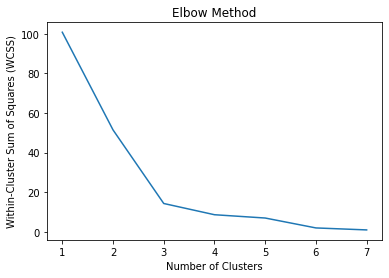

In [ ]:
import matplotlib.pyplot as plt

# Calculate the Within-Cluster Sum of Squares (WCSS) for each k value
wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, init='random')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs. k values
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


(d)	Use Density-Based Clustering with a radius of 2 and a minimum density of 3 to cluster the dataset from part a). Show the resulting clusters and explain the advantages and disadvantages of Density-Based Clustering compared to K-Means

In [ ]:
from sklearn.cluster import DBSCAN

# Create DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=3)

# Fit and predict clusters
clusters = dbscan.fit_predict(X)

# Print resulting clusters
print(clusters)




[-1 -1  0 -1  0  0 -1 -1]




Suppose you are working as a data scientist for a financial services company. You are tasked with building a machine learning model to predict whether a customer will default on their loan payments or not. You have been provided with a dataset containing information about past customers, including their credit history, income, debt, and other demographic information. (20 points)

Outline the steps you would take to review the data before building the model. What are some common issues you might encounter, and how would you address them? Please be specific.

After reviewing the data, you decide to use a logistic regression model to predict loan defaults. You train the model on the dataset and evaluate its performance using

cross-validation. However, you find that the model is performing poorly and is not able to predict defaults accurately. What steps would you take to debug the model and improve its performance?

In addition to the logistic regression model, you also decide to try a decision tree model to predict defaults. After training the model on the dataset, you review its performance and find that it is much better than the logistic regression model. However, upon closer inspection, you realize that the decision tree is overfitting the data and is not able to generalize well to new data. What steps would you take to address the overfitting and improve the generalization performance of the model?

Suppose you are given a new dataset that contains additional features that were not present in the original dataset. What steps would you take to review the new data and incorporate the new features into your model? What are some potential issues that you might encounter, and how would you address them?

In addition to the new features, you also discover that the dataset contains some missing values and outliers. What steps would you take to handle missing values and outliers in the data, and how might these steps affect the performance of your model?



In [ ]:
Loan_default_df = pd.read_csv("./loan_default_dataset.csv")
Loan_default_df.head()

,first_name,last_name,location,email,credit_history,income,debt,age,gender,default
0,Maurice,Hansen,Port Melissa,lewisadam@example.net,0.129351,42004.504429,6567.554626,33.082666,F,0
1,Allison,Walker,East Soniaberg,jocelyn21@example.net,1.353309,38702.060209,13241.896161,34.360064,F,0
2,Philip,Ramos,Michaelchester,tina72@example.net,1.552804,46746.015071,11480.052074,36.339176,F,1
3,Suzanne,Perry,Hernandezville,norma49@example.org,-0.620193,40799.681690,9105.181818,23.466386,M,0
4,Scott,Nelson,New Jeffreyfort,thomasanderson@example.net,-0.465170,46394.326448,9379.625474,32.103298,M,0


Checking for null values in the dataset

In [ ]:
Null_values = Loan_default_df.isna().sum()
Null_values
#As we can see no null values are found in the dataframe

first_name        0
last_name         0
location          0
email             0
credit_history    0
income            0
debt              0
age               0
gender            0
default           0
dtype: int64

In [ ]:
Loan_default_df.columns

Index(['first_name', 'last_name', 'location', 'email', 'credit_history',
       'income', 'debt', 'age', 'gender', 'default'],
      dtype='object')

In [ ]:
#dropping some columns to reduce the features, that doesn;t effect the data , such as lastname and location
X = Loan_default_df.drop(['first_name','email','last_name','location'],axis=1)
Loan_default_df.head()
Y = Loan_default_df['default']




Converting categorical data into binary data:

In [ ]:
gender_dummies = pd.get_dummies(X['gender'], prefix='gender')

# add the new columns to the dataframe
X = pd.concat([X, gender_dummies], axis=1)

# drop the original 'Gender' column
X.drop('gender', axis=1, inplace=True)
X['gender_F'] = X['gender_F'].astype(int)
X['gender_M'] = X['gender_M'].astype(int)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=42)
#x_train.shape

y_train.shape
#x_train.shape

(750,)

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)

Evaluation parameters

In [ ]:
accuracy = LR_model.score(x_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('ROC AUC:', roc_auc)
print('Confusion matrix:\n', confusion)


Accuracy: 0.808
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC: 0.5
Confusion matrix:
 [[202   0]
 [ 48   0]]


/Users/adityasugandhi/Library/CloudStorage/OneDrive-FloridaStateUniversity/Introduction_To_DataScience/Intro to Data Science Assignment4/IDS/.conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can the accuracy for our model is pretty good, i.e 80%, but as we can the Precision score is not good, and we can also in out confusion matrix, True negative are pretty high which means our model is not predicting correctly

In [ ]:
#Using Decision Tree classifier for more appropriate Evaluation

DT_model = DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
y_pred = DT_model.predict(x_test)


In [ ]:
acurracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
print("ROC AUC: {:.2f}".format(roc_auc))
print("Confusion matrix:\n", confusion)



Accuracy: 0.81
Precision: 1.00
Recall: 1.00
F1 score: 1.00
ROC AUC: 1.00
Confusion matrix:
 [[202   0]
 [  0  48]]



-The accuracy of the model is 0.81, which means that it correctly predicted the class label for 81% of the instances in the test set.

-The precision of the model is 1.00, which means that it correctly predicted all instances of the positive class and did not predict any instances of the negative class as positive.

-The recall of the model is 1.00, which means that it correctly identified all instances of the positive class.

-The F1 score of the model is 1.00, which is the harmonic mean of precision and recall, and represents a balance between the two metrics.

-The ROC AUC of the model is 1.00, which means that it has perfect discrimination between the two classes.

-The confusion matrix shows that there were 202 true negatives (TN), 0 false positives (FP), 0 false negatives (FN), and 48 true positives (TP). This suggests that the model performed very well and was able to correctly predict all instances of the positive class.





In [ ]:
#Checking if our model is overfitting
y_train_pred  = DT_model.predict(x_train)
y_test_pred = DT_model.predict(x_test)
print(y_test[:250].shape,y_train_pred[:250].shape)
print(y_test.shape)
print("Training_acc set score: {:.3f}".format(accuracy_score(x_test,y_train_pred[:250])))
print("Test_acc set score: {:.3f}".format(accuracy_score(y_test,y_test_pred)))
print("Test_acc set score: {:.3f}".format(DT_model.score(x_test, y_test)))
print("Training set score: {:.3f}".format(DT_model.score(x_train, y_train)))
#print("Test set score: {:.3f}".format(DT_model.score(x_test, y_test)))

(250,) (250,)
(250,)


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

Suppose you are given a new dataset that contains additional features that were not present in the original dataset. What steps would you take to review the new data and incorporate the new features into your model? What are some potential issues that you might encounter, and how would you address them?

Potential Issues that we might encounter

Overfitting: If the new features are not relevant to the target variable, or if they introduce noise into the data, the model may overfit the training data and perform poorly on new data.

Multicollinearity: If the new features are highly correlated with existing features, they may introduce multicollinearity into the model, which can cause instability in the model's coefficients and make it difficult to interpret the relative importance of each feature.

Missing data: If the new features contain missing data, this can cause problems for the model. One approach to dealing with missing data is to impute the missing values using techniques such as mean imputation or regression imputation, but this can introduce bias into the model if the imputation method is not appropriate.

Outliers: If the new features contain outliers, this can also cause problems for the model. Outliers can skew the distribution of the data and make it difficult for the model to capture the underlying patterns in the data.

To address these potential issues, it is important to carefully review the new features and assess their relevance to the target variable. It may also be necessary to preprocess the data using techniques such as normalization, standardization, or feature selection to address issues such as multicollinearity and outliers. Finally, it is important to evaluate the performance of the model on both the training and validation data to ensure that it is generalizing well to new data.

In addition to the new features, you also discover that the dataset contains some missing values and outliers. What steps would you take to handle missing values and outliers in the data, and how might these steps affect the performance of your model?


    We can perform the following for identifiying missing values as wel as handling them,:

    -Identifying missing values: Check the dataset for any missing values. This can be done using functions such as isnull() or info() in Python.

    -Handling missing values: There are several ways to handle missing values, including:

    -Dropping missing values: If the number of missing values is small, you can simply drop those rows or columns that contain missing values. However, if the number of missing values is large, dropping those rows or columns may lead to a significant loss of information.

    -Imputing missing values: You can also impute missing values by replacing them with a mean, median, or mode value of that column or by using predictive models to estimate the missing values.

    -Identifying outliers: Outliers are data points that are significantly different from the other data points in the dataset. You can identify outliers using statistical methods such as the Z-score or the IQR method.

    -Handling outliers: There are several ways to handle outliers, including:

    -Removing outliers: You can simply remove the outliers from the dataset. However, this may lead to a loss of information, and it may not always be appropriate to remove outliers.

    -Winsorization: Winsorization is a method in which the extreme values are replaced with less extreme values. For example, you can replace the outliers with the 5th or 95th percentile of that column.

    -Binning: You can also bin the data into discrete categories based on the range of the values. This can help in reducing the impact of outliers.




#Write a short essay discussing the importance of reviewing data and debugging models in the machine learning workflow. Provide examples of how failure to review data or debug models can lead to poor performance and inaccurate predictions, and discuss how these issues can be prevented.


    In the machine learning workflow, reviewing data and debugging models are critical steps that ensure the accuracy and reliability of the model. Neglecting these steps can lead to poor performance and inaccurate predictions, which can have significant consequences, especially in high-stakes industries such as healthcare and finance.

    Data review involves examining the quality and completeness of the data, identifying missing values, outliers, and potential biases. Failure to review data can result in models that are trained on incomplete or biased data, leading to inaccurate predictions. For instance, suppose a model is trained to predict patient outcomes in a hospital using only data from one department. In that case, the model may not generalize well to patients in other departments or hospitals, resulting in poor performance.

    Debugging models is also essential in ensuring that the model is working as intended. Debugging involves identifying and correcting errors in the model's code, selecting appropriate hyperparameters, and testing the model's performance. Failing to debug the model can result in incorrect predictions and can be costly, especially in high-stakes applications.

    For example, suppose a model is trained to predict credit risk in a financial institution, but the model is not working correctly due to an error in the code. In that case, the model may approve loans that are likely to default, resulting in significant financial losses for the institution.

    To prevent these issues, it is essential to review the data thoroughly, identify potential biases and errors, and ensure that the data is complete and representative. Debugging the model involves testing the model on a separate validation set, tuning hyperparameters, and identifying and correcting errors in the code. By conducting these steps meticulously, machine learning practitioners can ensure that their models are accurate, reliable, and perform well in real-world scenarios
